# 판다스 데이터 분석
## 데이터 그룹화
Pandas의 groupby 함수는 데이터를 특정 기준에 따라 분류하고, 이 분류된 그룹별로 다양한 연산을 수행할 수 있게 도와줍니다. 이는 SQL의 GROUP BY 문과 유사하게 동작합니다. Pandas의 groupby 함수는 다음과 같은 단계로 동작합니다.

1. Split: 데이터를 특정 조건에 따라 여러 그룹으로 나눕니다.
2. Apply: 각 그룹에 함수를 적용합니다.
3. Combine: 결과를 하나의 데이터 구조로 결합합니다.

In [21]:
import pandas as pd

#csv: 데이터를 콤마(,)로 구분해놓은 파일
#tsv: 데이터를 탭으로 구분해놓은 파일
df = pd.read_csv("data/gapminder.tsv", sep="\t")
df


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [29]:
a = df.groupby('year')['lifeExp'].mean()
a

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

<Axes: xlabel='year'>

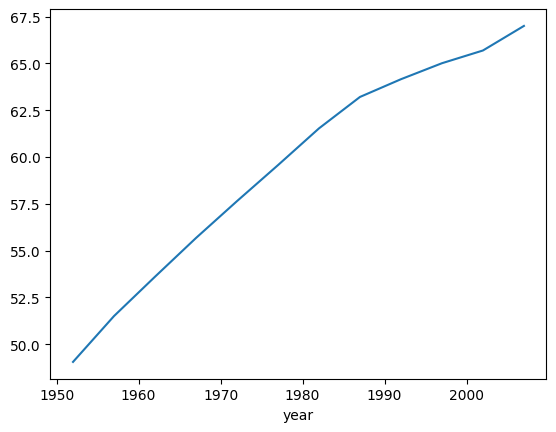

In [30]:
a.plot()

In [ ]:
a.to_csv('result.csv')

In [31]:
#연도별로 기대주명 평균, 인구수 중앙값, 1인당 GDP 평균, 중앙값
df.groupby("year").agg({"lifeExp":"mean", 
                        "pop":"median",
                        "gdpPercap":['mean','median','sum']})

lifeExp         pop     gdpPercap                           
           mean      median          mean       median           sum
year                                                                
1952  49.057620   3943953.0   3725.276046  1968.528344  5.289892e+05
1957  51.507401   4282942.0   4299.408345  2173.220291  6.105160e+05
1962  53.609249   4686039.5   4725.812342  2335.439533  6.710654e+05
1967  55.678290   5170175.5   5483.653047  2678.334740  7.786787e+05
1972  57.647386   5877996.5   6770.082815  3339.129407  9.613518e+05
1977  59.570157   6404036.5   7313.166421  3798.609244  1.038470e+06
1982  61.533197   7007320.0   7518.901673  4216.228428  1.067684e+06
1987  63.212613   7774861.5   7900.920218  4280.300366  1.121931e+06
1992  64.160338   8688686.5   8158.608521  4386.085502  1.158522e+06
1997  65.014676   9735063.5   9090.175363  4781.825478  1.290805e+06
2002  65.694923  10372918.5   9917.848365  5319.804524  1.408334e+06
2007  67.007423  10517531.0  11680.071820  6124.371108  1.658570e+06

In [35]:
a = df.groupby("year")['gdpPercap'].idxmax()   #idx는 행번호 : 위치 최대값

df.iloc[a][['year','country','gdpPercap']]

,year,country,gdpPercap
852,1952,Kuwait,108382.35290
853,1957,Kuwait,113523.13290
854,1962,Kuwait,95458.11176
855,1967,Kuwait,80894.88326
856,1972,Kuwait,109347.86700
857,1977,Kuwait,59265.47714
1314,1982,Saudi Arabia,33693.17525
1147,1987,Norway,31540.97480
860,1992,Kuwait,34932.91959
1149,1997,Norway,41283.16433


In [44]:
#퀴즈: 대륙별로 나라가 몇개인지?

#중복허용: count()
#중복허용x: nunique()

df.groupby("continent")['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

### 연습문제
1. 각 나라별로 인구의 평균을 계산하세요.

In [17]:
p = df.groupby("country")["pop"].mean()
p


country
Afghanistan           1.582372e+07
Albania               2.580249e+06
Algeria               1.987541e+07
Angola                7.309390e+06
Argentina             2.860224e+07
                          ...     
Vietnam               5.456857e+07
West Bank and Gaza    1.848606e+06
Yemen, Rep.           1.084319e+07
Zambia                6.353805e+06
Zimbabwe              7.641966e+06
Name: pop, Length: 142, dtype: float64

2. 2000년 이후 데이터를 기반으로, 각 대륙의 평균 인구를 계산하세요.

In [69]:
y = df.query('year >= 2000')
c = y.groupby("continent")["pop"].mean()
c


continent
Africa      1.695446e+07
Americas    3.497288e+07
Asia        1.123296e+08
Europe      1.940537e+07
Oceania     1.200119e+07
Name: pop, dtype: float64

3. 연도별로 기대수명의 최소값과 최대값을 계산하세요.

In [51]:
hmin = df.groupby("year")["lifeExp"].min()
hmin

year
1952    28.801
1957    30.332
1962    31.997
1967    34.020
1972    35.400
1977    31.220
1982    38.445
1987    39.906
1992    23.599
1997    36.087
2002    39.193
2007    39.613
Name: lifeExp, dtype: float64

In [52]:
hmax = df.groupby("year")["lifeExp"].max()
hmax

year
1952    72.670
1957    73.470
1962    73.680
1967    74.160
1972    74.720
1977    76.110
1982    77.110
1987    78.670
1992    79.360
1997    80.690
2002    82.000
2007    82.603
Name: lifeExp, dtype: float64

In [84]:
df.groupby('year').agg({'lifeExp':['min','max']})

lifeExp        
         min     max
year                
1952  28.801  72.670
1957  30.332  73.470
1962  31.997  73.680
1967  34.020  74.160
1972  35.400  74.720
1977  31.220  76.110
1982  38.445  77.110
1987  39.906  78.670
1992  23.599  79.360
1997  36.087  80.690
2002  39.193  82.000
2007  39.613  82.603

4. 각 대륙에서 가장 인구가 많은 나라는 무엇인지 찾으세요.

In [85]:
a = df.groupby("continent")['pop'].idxmax()   #idx는 행번호 : 위치 최대값

df.loc[a,['continent','country','pop']]

,continent,country,pop
1139,Africa,Nigeria,135031164
1619,Americas,United States,301139947
299,Asia,China,1318683096
575,Europe,Germany,82400996
71,Oceania,Australia,20434176


5. 연도별로 가장 기대 수명이 높은 나라는 무엇인지 찾으세요.

In [62]:
a = df.groupby("year")['lifeExp'].idxmax()   #idx는 행번호 : 위치 최대값

df.iloc[a][['year','country', 'lifeExp']]

,year,country,lifeExp
1140,1952,Norway,72.670
685,1957,Iceland,73.470
686,1962,Iceland,73.680
1467,1967,Sweden,74.160
1468,1972,Sweden,74.720
689,1977,Iceland,76.110
798,1982,Japan,77.110
799,1987,Japan,78.670
800,1992,Japan,79.360
801,1997,Japan,80.690


6. 연도별로, 전세계 인구 대비 각 대륙의 인구 비율을 계산하세요.

In [89]:
a = df.groupby(["year",'continent'])['pop'].sum() / df.groupby('year')['pop'].sum() * 100
a

year  continent
1952  Africa        9.873067
      Americas     14.339784
      Asia         57.971840
      Europe       17.371346
      Oceania       0.443963
1957  Africa        9.939847
      Americas     14.523092
      Asia         58.654028
      Europe       16.434830
      Oceania       0.448204
1962  Africa       10.225485
      Americas     14.941472
      Asia         58.499453
      Europe       15.875504
      Oceania       0.458087
1967  Africa       10.420878
      Americas     14.941720
      Asia         59.228460
      Europe       14.955157
      Oceania       0.453784
1972  Africa       10.620128
      Americas     14.799765
      Asia         60.133799
      Europe       13.996037
      Oceania       0.450271
1977  Africa       11.019236
      Americas     14.708930
      Asia         60.673938
      Europe       13.159249
      Oceania       0.438646
1982  Africa       11.641355
      Americas     14.694025
      Asia         60.850309
      Europe       12.38547

7. 각 대륙별로, 연도별로 기대 수명의 최소값, 최대값, 평균값을 계산하세요.

In [93]:

df.groupby(['continent','year']).agg({'lifeExp' :['min','max','mean']})


lifeExp                   
                   min     max       mean
continent year                           
Africa    1952  30.000  52.724  39.135500
          1957  31.570  58.089  41.266346
          1962  32.767  60.246  43.319442
          1967  34.113  61.557  45.334538
          1972  35.400  64.274  47.450942
          1977  36.788  67.064  49.580423
          1982  38.445  69.885  51.592865
          1987  39.906  71.913  53.344788
          1992  23.599  73.615  53.629577
          1997  36.087  74.772  53.598269
          2002  39.193  75.744  53.325231
          2007  39.613  76.442  54.806038
Americas  1952  37.579  68.750  53.279840
          1957  40.696  69.960  55.960280
          1962  43.428  71.300  58.398760
          1967  45.032  72.130  60.410920
          1972  46.714  72.880  62.394920
          1977  49.923  74.210  64.391560
          1982  51.461  75.760  66.228840
          1987  53.636  76.860  68.090720
          1992  55.089  77.950  69.568360
          1997  56.671  78.610  71.150480
          2002  58.137  79.770  72.422040
          2007  60.916  80.653  73.608120
Asia      1952  28.801  65.390  46.314394
          1957  30.332  67.840  49.318544
          1962  31.997  69.390  51.563223
          1967  34.020  71.430  54.663640
          1972  36.088  73.420  57.319269
          1977  31.220  75.380  59.610556
          1982  39.854  77.110  62.617939
          1987  40.822  78.670  64.851182
          1992  41.674  79.360  66.537212
          1997  41.763  80.690  68.020515
          2002  42.129  82.000  69.233879
          2007  43.828  82.603  70.728485
Europe    1952  43.585  72.670  64.408500
          1957  48.079  73.470  66.703067
          1962  52.098  73.680  68.539233
          1967  54.336  74.160  69.737600
          1972  57.005  74.720  70.775033
          1977  59.507  76.110  71.937767
          1982  61.036  76.990  72.806400
          1987  63.108  77.410  73.642167
          1992  66.146  78.770  74.440100
          1997  68.835  79.390  75.505167
          2002  70.845  80.620  76.700600
          2007  71.777  81.757  77.648600
Oceania   1952  69.120  69.390  69.255000
          1957  70.260  70.330  70.295000
          1962  70.930  71.240  71.085000
          1967  71.100  71.520  71.310000
          1972  71.890  71.930  71.910000
          1977  72.220  73.490  72.855000
          1982  73.840  74.740  74.290000
          1987  74.320  76.320  75.320000
          1992  76.330  77.560  76.945000
          1997  77.550  78.830  78.190000
          2002  79.110  80.370  79.740000
          2007  80.204  81.235  80.719500

8. 각 나라에서 가장 낮은 1인당 GDP가 발생한 연도를 찾으세요.

In [98]:
a = df.groupby('country')['gdpPercap'].idxmin()
df.loc[a,['country','year','gdpPercap']]

,country,year,gdpPercap
9,Afghanistan,1997,635.341351
12,Albania,1952,1601.056136
24,Algeria,1952,2449.008185
45,Angola,1997,2277.140884
48,Argentina,1952,5911.315053
...,...,...,...
1644,Vietnam,1952,605.066492
1656,West Bank and Gaza,1952,1515.592329
1668,"Yemen, Rep.",1952,781.717576
1689,Zambia,1997,1071.353818


9. 연도별로, 기대 수명은 평균과 중앙값, 인구수는 총합, 1인당 GDP는 평균을 구하세요.

In [82]:

df.groupby("year").agg({"lifeExp":["mean",'median'], 
                        "pop":"sum",
                        "gdpPercap":'mean'})

lifeExp                  pop     gdpPercap
           mean   median         sum          mean
year                                              
1952  49.057620  45.1355  2406957150   3725.276046
1957  51.507401  48.3605  2664404580   4299.408345
1962  53.609249  50.8810  2899782974   4725.812342
1967  55.678290  53.8250  3217478384   5483.653047
1972  57.647386  56.5300  3576977158   6770.082815
1977  59.570157  59.6720  3930045807   7313.166421
1982  61.533197  62.4415  4289436840   7518.901673
1987  63.212613  65.8340  4691477418   7900.920218
1992  64.160338  67.7030  5110710260   8158.608521
1997  65.014676  69.3940  5515204472   9090.175363
2002  65.694923  70.8255  5886977579   9917.848365
2007  67.007423  71.9355  6251013179  11680.071820

10. 각 대륙에서 1인당 GDP 대비 가장 높은 기대 수명을 가진 나라를 찾으세요.

In [104]:
df['sample']=df['lifeExp'] / df['gdpPercap']
a = df.groupby("continent")['sample'].idxmax()
df.loc[a, ['continent','country','sample']]

,continent,country,sample
334,Africa,"Congo, Dem. Rep.",0.186453
647,Americas,Haiti,0.050694
1052,Asia,Myanmar,0.170951
144,Europe,Bosnia and Herzegovina,0.055283
60,Oceania,Australia,0.006885


In [108]:
dic = {}

for i in df.groupby('year'):
    dic[i[0]] =i[1]

In [109]:
dic.keys()

dict_keys([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007])

In [110]:
dic[1952]

,country,continent,year,lifeExp,pop,gdpPercap,sample
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,0.036951
12,Albania,Europe,1952,55.230,1282697,1601.056136,0.034496
24,Algeria,Africa,1952,43.077,9279525,2449.008185,0.017590
36,Angola,Africa,1952,30.015,4232095,3520.610273,0.008526
48,Argentina,Americas,1952,62.485,17876956,5911.315053,0.010570
...,...,...,...,...,...,...,...
1644,Vietnam,Asia,1952,40.412,26246839,605.066492,0.066789
1656,West Bank and Gaza,Asia,1952,43.160,1030585,1515.592329,0.028477
1668,"Yemen, Rep.",Asia,1952,32.548,4963829,781.717576,0.041637
1680,Zambia,Africa,1952,42.038,2672000,1147.388831,0.036638


## 데이터 정렬과 순위

In [114]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/250.0 kB ? eta -:--:--
     ------------------------------------- 250.0/250.0 kB 16.0 MB/s eta 0:00:00


In [139]:
df=pd.read_excel("data/성적 처리.xlsx", sheet_name="Sheet1")
df

,반,성명,국어,영어,수학,사회,과학
0,1반,홍길동,93,80,94,73,64
1,5반,백일홍,93,63,76,84,92
2,3반,이삼상,94,74,86,90,70
3,4반,정말로,83,55,64,90,65
4,5반,한번도,87,95,66,75,60
5,4반,이철수,53,81,59,88,69
6,3반,김영자,71,71,51,84,57
7,5반,다니엘,87,54,95,71,97
8,2반,이미로,59,54,75,90,82
9,1반,신성삼,64,66,59,91,86


In [146]:
#총합, 평균 열 만들기
#df['총합']=df['국어'] + df['영어'] + df['수학'] + df['사회'] + df['과학']
#df['평균'] = df['총합']/5df['총합']=df.iloc[:,2:].sum(axis=1)
df['총합'] = df.iloc[:, 2:].sum(axis = 1) #axis = 0 아래방향 / axis = 1 오른쪽방향
df['평균'] = df['총합']/5
# df.sort_values("총합",ascending=False) False : 내림차순
# df.sort_values(['반', '총합'], ascending=False)

#반은 오름차순 총합은 내림차순
df.sort_values(['반', '총합'], ascending=[True,False])

,반,성명,국어,영어,수학,사회,과학,총합,평균
0,1반,홍길동,93,80,94,73,64,1470.56,294.112
9,1반,신성삼,64,66,59,91,86,1332.24,266.448
17,1반,유비비,67,94,61,61,52,1219.40,243.880
16,1반,소행성,62,58,58,62,73,1139.32,227.864
18,2반,이관우,91,65,57,79,93,1401.40,280.280
19,2반,장비비,52,82,93,81,75,1394.12,278.824
8,2반,이미로,59,54,75,90,82,1310.40,262.080
11,2반,장발장,85,51,64,80,68,1266.72,253.344
2,3반,이삼상,94,74,86,90,70,1506.96,301.392
15,3반,조미료,86,68,97,56,85,1426.88,285.376


### 연습문제
```class.csv``` 파일을 불러와 아래 문제들을 해결하세요.

1. 수학 점수(MathScore)에 따라 학생들을 오름차순으로 정렬하세요.

In [147]:
df = pd.read_csv('data/class.csv')
df

,Class,StudentID,Name,MathScore,EnglishScore,ScienceScore
0,Class 2,1,Student1,50,71,90
1,Class 3,2,Student2,98,89,66
2,Class 4,3,Student3,67,92,96
3,Class 5,4,Student4,90,60,82
4,Class 1,5,Student5,71,79,80
...,...,...,...,...,...,...
95,Class 2,96,Student96,77,97,83
96,Class 3,97,Student97,53,86,98
97,Class 4,98,Student98,83,92,99
98,Class 5,99,Student99,77,66,66


In [148]:
df.sort_values('MathScore', ascending=True)

,Class,StudentID,Name,MathScore,EnglishScore,ScienceScore
0,Class 2,1,Student1,50,71,90
50,Class 2,51,Student51,50,79,69
73,Class 5,74,Student74,50,72,61
96,Class 3,97,Student97,53,86,98
93,Class 5,94,Student94,53,89,79
...,...,...,...,...,...,...
8,Class 5,9,Student9,98,66,94
1,Class 3,2,Student2,98,89,66
72,Class 4,73,Student73,98,54,94
78,Class 5,79,Student79,99,74,68


2. 영어 점수(EnglishScore)에 따라 학생들을 내림차순으로 정렬하세요.

In [149]:
df.sort_values('EnglishScore', ascending=False)

,Class,StudentID,Name,MathScore,EnglishScore,ScienceScore
22,Class 4,23,Student23,86,99,89
5,Class 2,6,Student6,80,99,70
25,Class 2,26,Student26,67,99,84
38,Class 5,39,Student39,97,97,85
70,Class 2,71,Student71,96,97,52
...,...,...,...,...,...,...
27,Class 4,28,Student28,77,51,51
13,Class 5,14,Student14,89,51,84
35,Class 2,36,Student36,84,51,75
26,Class 3,27,Student27,87,50,78


3. 과학 점수(ScienceScore)가 가장 높은 학생 5명을 찾으세요.

In [182]:
# a = df.sort_values('ScienceScore', ascending=False).head(n=5)
# a['Name']
df.sort_values('ScienceScore', ascending=False).iloc[:5]

,Class,StudentID,Name,MathScore,EnglishScore,ScienceScore,TotalScore,AvgScore,ScoreStd
24,Class 1,25,Student25,82,62,99,486,162.000000,19.112308
97,Class 4,98,Student98,83,92,99,548,182.666667,19.112308
33,Class 5,34,Student34,78,52,98,456,152.000000,19.112308
55,Class 2,56,Student56,87,73,98,516,172.000000,19.112308
18,Class 5,19,Student19,66,80,98,488,162.666667,19.112308


4. 수학 점수(MathScore)가 가장 낮은 학생 3명을 찾으세요.

In [184]:
df.sort_values('MathScore', ascending=True).head(n=3)


,Class,StudentID,Name,MathScore,EnglishScore,ScienceScore,TotalScore,AvgScore,ScoreStd
0,Class 2,1,Student1,50,71,90,422,140.666667,19.112308
50,Class 2,51,Student51,50,79,69,396,132.000000,19.112308
73,Class 5,74,Student74,50,72,61,366,122.000000,19.112308


5. 수학 점수(MathScore)를 정렬하고, 수학 점수가 동일한 경우에는 과학 점수(ScienceScore)를 기준으로 학생들을 정렬하세요.

In [185]:
df.sort_values(['MathScore', 'ScienceScore'])

,Class,StudentID,Name,MathScore,EnglishScore,ScienceScore,TotalScore,AvgScore,ScoreStd
73,Class 5,74,Student74,50,72,61,366,122.000000,19.112308
50,Class 2,51,Student51,50,79,69,396,132.000000,19.112308
0,Class 2,1,Student1,50,71,90,422,140.666667,19.112308
16,Class 3,17,Student17,53,69,77,398,132.666667,19.112308
93,Class 5,94,Student94,53,89,79,442,147.333333,19.112308
...,...,...,...,...,...,...,...,...,...
77,Class 4,78,Student78,98,57,66,442,147.333333,19.112308
8,Class 5,9,Student9,98,66,94,516,172.000000,19.112308
72,Class 4,73,Student73,98,54,94,492,164.000000,19.112308
78,Class 5,79,Student79,99,74,68,482,160.666667,19.112308


6. 각 학생의 총 점수(TotalScore)열을 새로 만들고, 이 열을 기준으로 내림차순으로 정렬하세요.

In [166]:
df['TotalScore'] = df.iloc[:, 3:].sum(axis = 1)
df.sort_values(['TotalScore'], ascending=False)

,Class,StudentID,Name,MathScore,EnglishScore,ScienceScore,TotalScore
38,Class 5,39,Student39,97,97,85,558
52,Class 4,53,Student53,95,85,95,550
22,Class 4,23,Student23,86,99,89,548
97,Class 4,98,Student98,83,92,99,548
57,Class 4,58,Student58,89,85,93,534
...,...,...,...,...,...,...,...
73,Class 5,74,Student74,50,72,61,366
17,Class 4,18,Student18,57,62,63,364
27,Class 4,28,Student28,77,51,51,358
14,Class 1,15,Student15,59,52,67,356


7. 반(Class)을 오름차순으로 정렬하되, 같은 반 내에서는 학생 ID(StudentID)를 내림차순으로 정렬하세요.

In [167]:
df.sort_values(['Class', 'StudentID'], ascending=[True,False])

,Class,StudentID,Name,MathScore,EnglishScore,ScienceScore,TotalScore
99,Class 1,100,Student100,86,76,74,472
94,Class 1,95,Student95,79,90,85,508
89,Class 1,90,Student90,85,57,69,422
84,Class 1,85,Student85,86,63,83,464
79,Class 1,80,Student80,62,74,64,400
...,...,...,...,...,...,...,...
23,Class 5,24,Student24,56,76,83,430
18,Class 5,19,Student19,66,80,98,488
13,Class 5,14,Student14,89,51,84,448
8,Class 5,9,Student9,98,66,94,516


8. 각 학생의 총 점수(TotalScore)를 기준으로 학생들을 내림차순으로 정렬하세요. 총 점수가 같은 경우, 학생 ID를 오름차순으로 정렬하세요.

In [168]:
df.sort_values(['TotalScore', 'StudentID'], ascending=[False,True])

,Class,StudentID,Name,MathScore,EnglishScore,ScienceScore,TotalScore
38,Class 5,39,Student39,97,97,85,558
52,Class 4,53,Student53,95,85,95,550
22,Class 4,23,Student23,86,99,89,548
97,Class 4,98,Student98,83,92,99,548
57,Class 4,58,Student58,89,85,93,534
...,...,...,...,...,...,...,...
73,Class 5,74,Student74,50,72,61,366
17,Class 4,18,Student18,57,62,63,364
27,Class 4,28,Student28,77,51,51,358
14,Class 1,15,Student15,59,52,67,356


9. 각 학생의 평균 점수(AvgScore)열을 새롭게 만들고, 이를 기준으로 학생들을 내림차순으로 정렬하세요. 평균 점수가 같은 경우, 학생 ID를 오름차순으로 정렬하세요.

In [170]:
df['AvgScore'] = df['TotalScore'] / 3
df.sort_values(['AvgScore','StudentID'], ascending=[False,True])

,Class,StudentID,Name,MathScore,EnglishScore,ScienceScore,TotalScore,AvgScore
38,Class 5,39,Student39,97,97,85,558,186.000000
52,Class 4,53,Student53,95,85,95,550,183.333333
22,Class 4,23,Student23,86,99,89,548,182.666667
97,Class 4,98,Student98,83,92,99,548,182.666667
57,Class 4,58,Student58,89,85,93,534,178.000000
...,...,...,...,...,...,...,...,...
73,Class 5,74,Student74,50,72,61,366,122.000000
17,Class 4,18,Student18,57,62,63,364,121.333333
27,Class 4,28,Student28,77,51,51,358,119.333333
14,Class 1,15,Student15,59,52,67,356,118.666667


10. 각 학생의 수학(MathScore), 영어(EnglishScore), 과학(ScienceScore) 점수의 표준 편차(ScoreStd)를 구하고, 그 표준 편차가 가장 큰 학생 5명을 찾으세요.

In [189]:
df['ScoreStd'] =  df.iloc[:, 3:5].std(axis = 1)
df.sort_values(['ScoreStd'], ascending=False).head(n=5)


,Class,StudentID,Name,MathScore,EnglishScore,ScienceScore,TotalScore,AvgScore,ScoreStd
72,Class 4,73,Student73,98,54,94,492,164.000000,31.112698
59,Class 1,60,Student60,96,52,58,412,137.333333,31.112698
58,Class 5,59,Student59,54,95,53,404,134.666667,28.991378
77,Class 4,78,Student78,98,57,66,442,147.333333,28.991378
80,Class 2,81,Student81,56,97,71,448,149.333333,28.991378


In [193]:
df=pd.read_excel("data/성적 처리.xlsx", sheet_name="Sheet1")
df['총합'] = df.iloc[:, 2:].sum(axis = 1) #axis = 0 아래방향 / axis = 1 오른쪽방향

# 3등이 2명이면, 둘 다 3.5등으로 처리하고 다음 등수를 5등으로
# df['순위'] = df['총합'].rank(method='average', ascending=False)

# 3등이 2명이면, 둘 다 4등으로 처리하고 다음 등수를 5등으로
# df['순위'] = df['총합'].rank(method='max', ascending=False)

# 3등이 2명이면, 둘 다 3등으로 처리하고 다음 등수를 5등으로
# df['순위'] = df['총합'].rank(method='min', ascending=False)

# 3등이 2명이면, 먼저 발견된 애는 3등, 다음 발견된 애는 4등(선착순)
# df['순위'] = df['총합'].rank(method='first', ascending=False)

# min방법과 같다. 3등이 2명이면, 둘 다 3등으로 처리하고 다음 등수를 4등
# df['순위'] = df['총합'].rank(method='min', ascending=False)
df


,반,성명,국어,영어,수학,사회,과학,총합,순위
0,1반,홍길동,93,80,94,73,64,404,3.5
1,5반,백일홍,93,63,76,84,92,408,2.0
2,3반,이삼상,94,74,86,90,70,414,1.0
3,4반,정말로,83,55,64,90,65,357,12.5
4,5반,한번도,87,95,66,75,60,383,7.5
5,4반,이철수,53,81,59,88,69,350,14.0
6,3반,김영자,71,71,51,84,57,334,17.0
7,5반,다니엘,87,54,95,71,97,404,3.5
8,2반,이미로,59,54,75,90,82,360,11.0
9,1반,신성삼,64,66,59,91,86,366,10.0
